# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

**Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.**

**The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.**

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [97]:
# Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [98]:
# Read the data using pandas dataframe
titanic_df = pd.read_csv("tested.csv")

In [99]:
# Show the data head!
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- **Display the last 7 rows in the titanic_df dataframe**

In [100]:
titanic_df.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# TASK #3: PERFORM DATA VISUALIZATION - PART #1

In [101]:
# Let's count the number of survivors and non-survivors
survived_df = titanic_df[titanic_df['Survived'] == 1]
no_survived_df = titanic_df[titanic_df['Survived'] == 0]

In [102]:
survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [103]:
# Count the survived and deceased 
print("Total =", len(titanic_df))

print("Number of passengers who survived =", len(survived_df))
print("Percentage Survived =", 1. * len(survived_df) / len(titanic_df) * 100.0, "%")
 
print("Number of passengers who did not Survive =", len(no_survived_df))
print("Percentage who did not survive =", 1. * len(no_survived_df) / len(titanic_df) * 100.0, "%")
         

Total = 418
Number of passengers who survived = 152
Percentage Survived = 36.36363636363637 %
Number of passengers who did not Survive = 266
Percentage who did not survive = 63.63636363636363 %


<Axes: xlabel='Pclass', ylabel='count'>

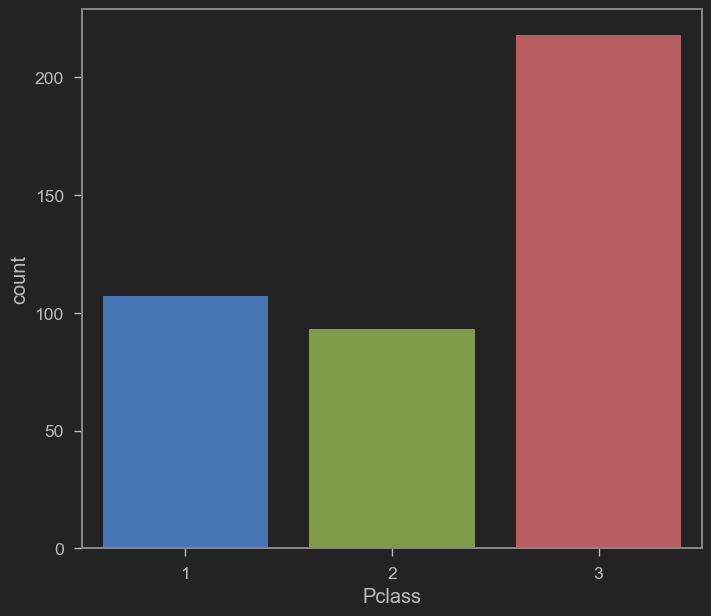

In [104]:
# Bar Chart to indicate the number of people who survived based on their class
# If you are a first class, you have a higher chance of survival
sns.countplot(x= 'Pclass', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

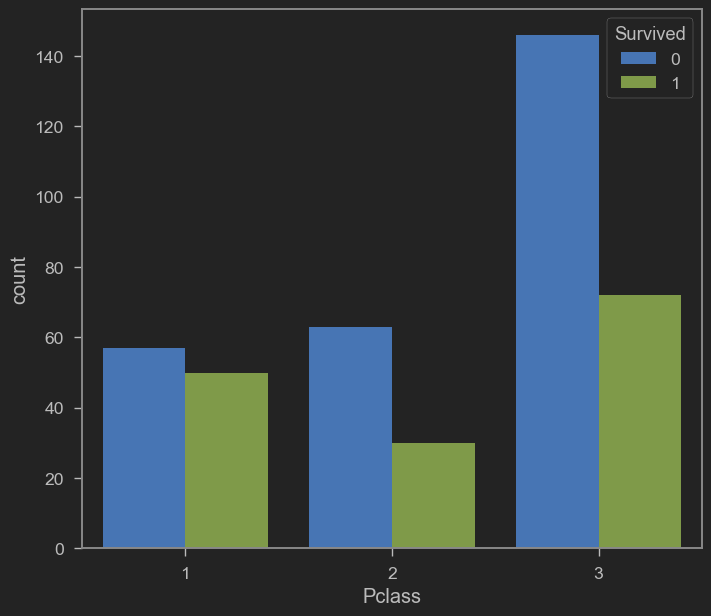

In [105]:
sns.countplot(x = 'Pclass', hue='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

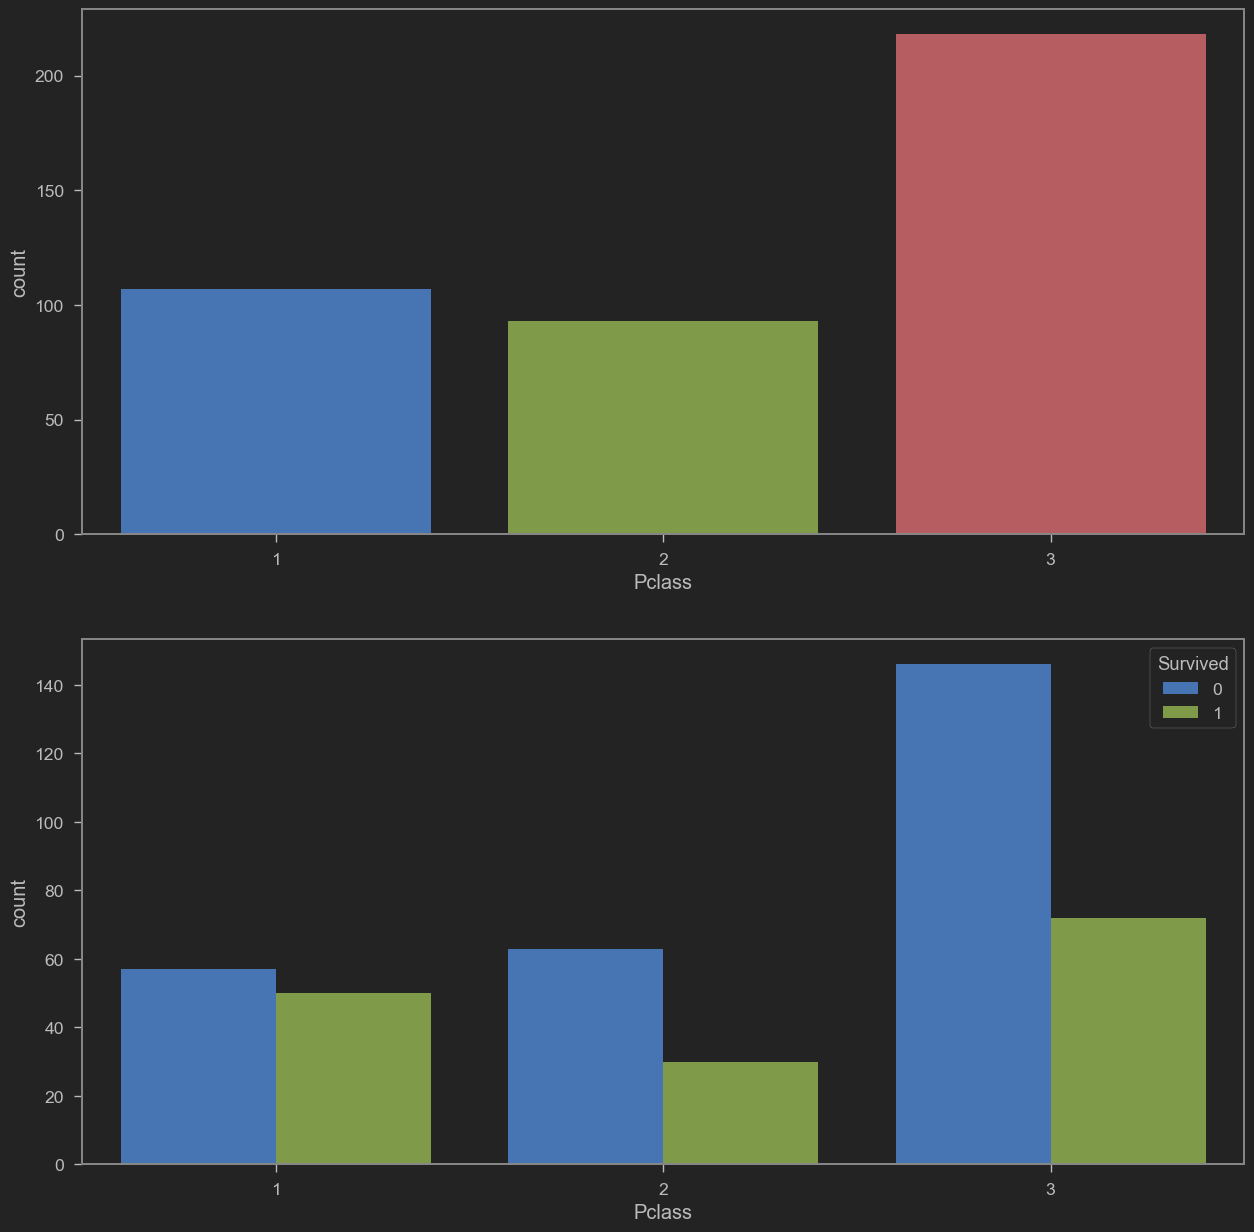

In [106]:
plt.figure(figsize= [15,15])
plt.subplot(211)
sns.countplot(x= 'Pclass', data=titanic_df)

plt.subplot(212)
sns.countplot(x = 'Pclass', hue='Survived', data=titanic_df)

- **Plot the number of people who survived based on thier siblings status**
- **Do you have a higher chance of survival if you have zero or one sibling?**

<Axes: xlabel='SibSp', ylabel='count'>

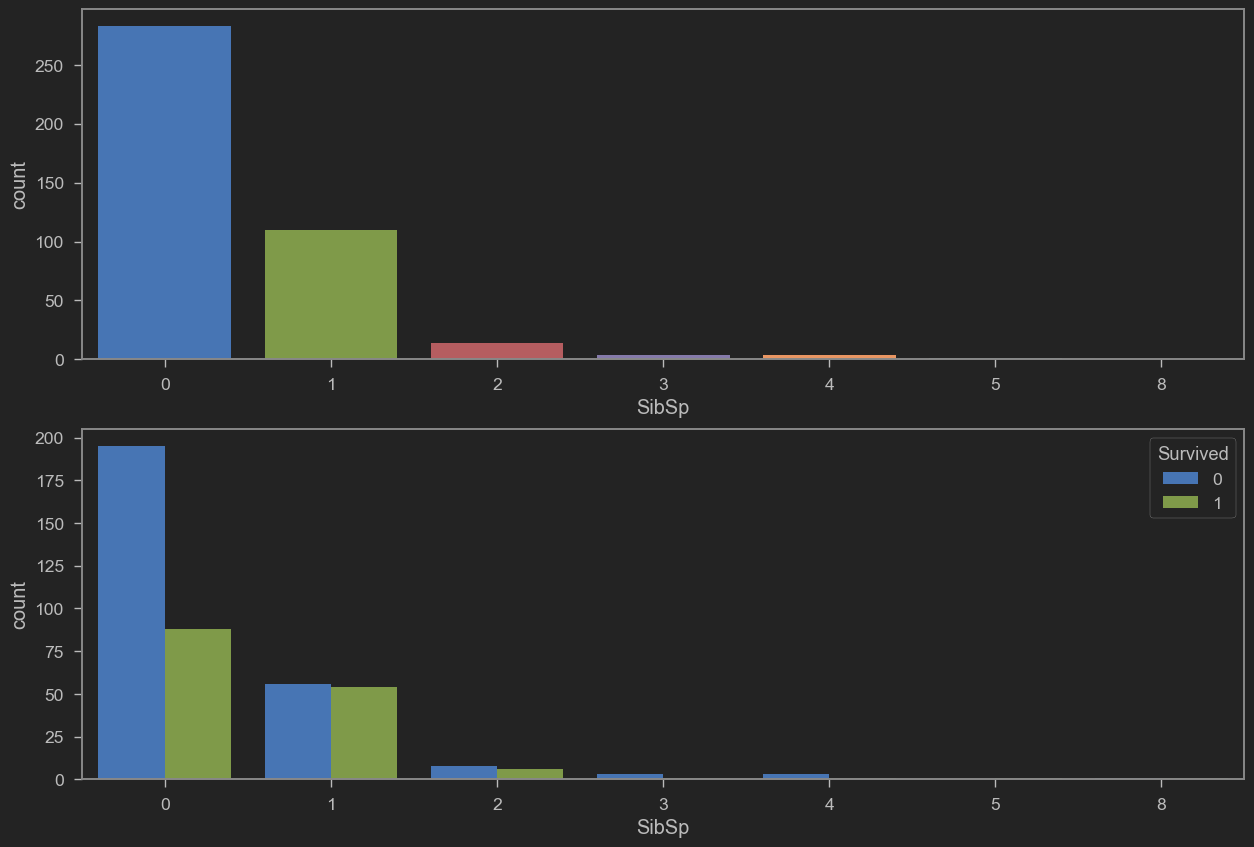

In [107]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x='SibSp', data=titanic_df)

plt.subplot(212)
sns.countplot(x='SibSp',hue='Survived', data=titanic_df)

# TASK #4: PERFORM DATA VISUALIZATION - PART #2

<Axes: xlabel='Parch', ylabel='count'>

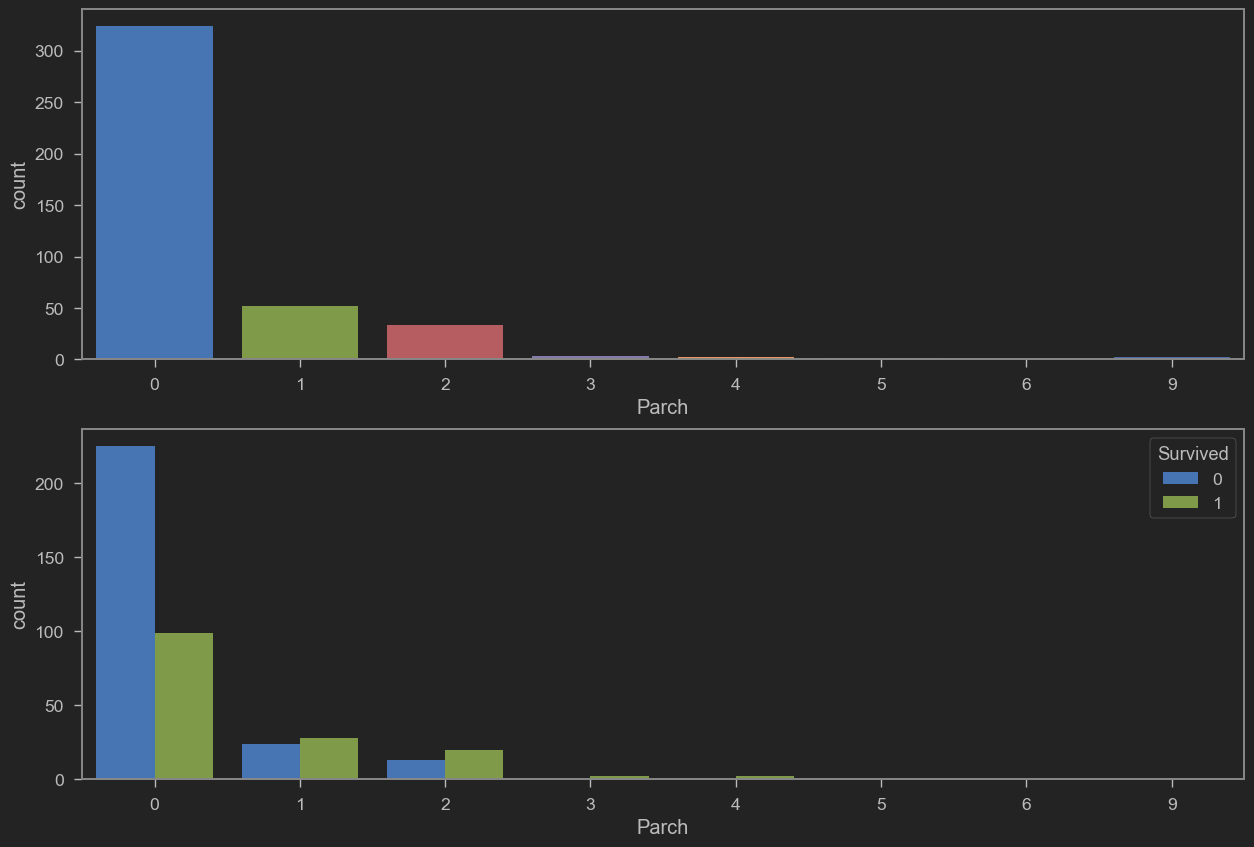

In [108]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x='Parch', data=titanic_df)

plt.subplot(212)
sns.countplot(x='Parch',hue='Survived', data=titanic_df)


<Axes: xlabel='Sex', ylabel='count'>

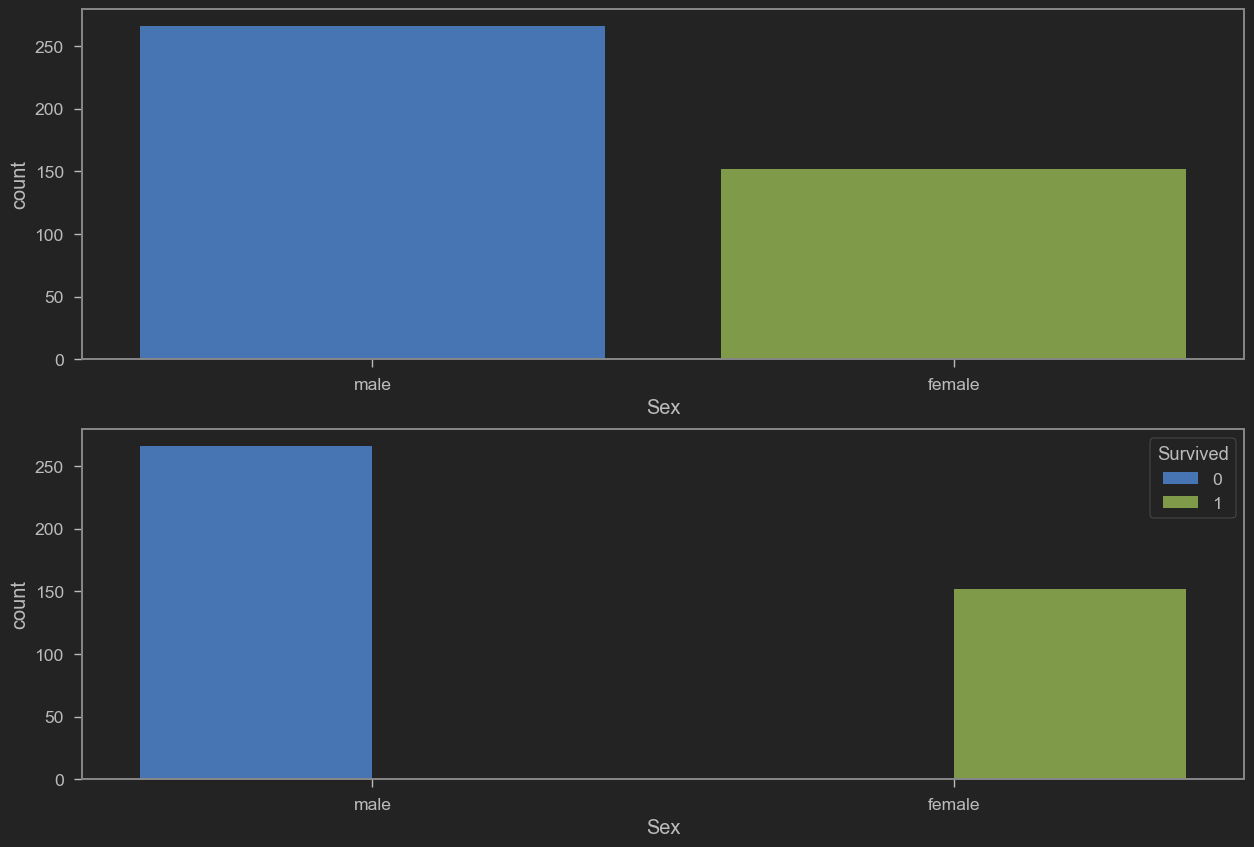

In [109]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other ports!
plt.figure(figsize = [15, 10])
plt.subplot(211)
sns.countplot(x = 'Sex', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_df)

<Axes: >

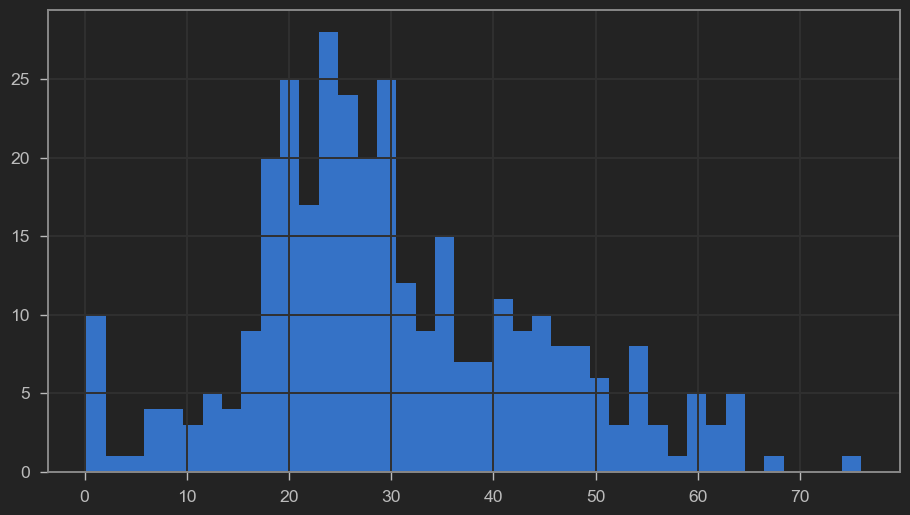

In [110]:
# Age Histogram 
plt.figure(figsize=[11,6])
titanic_df['Age'].hist(bins=40)

- **Plot the histogram for the "Fare" column**

<Axes: >

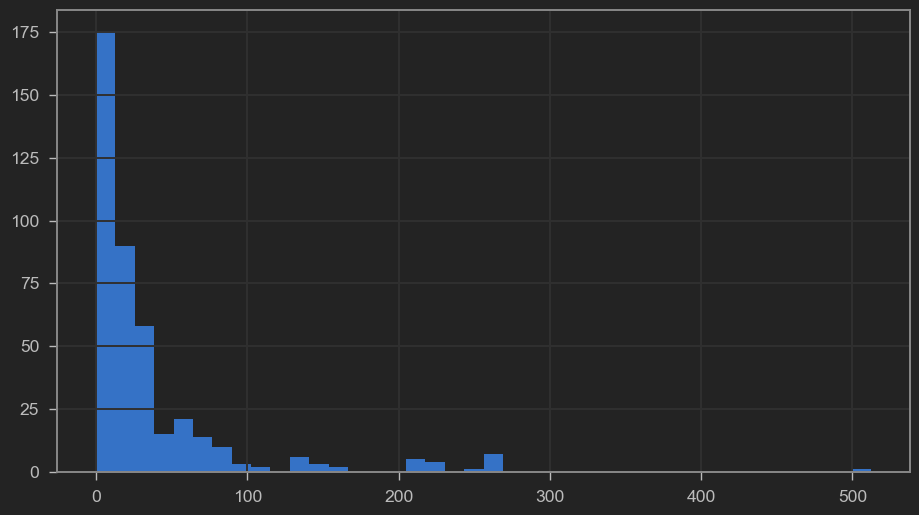

In [111]:
plt.figure(figsize=[11,6])
titanic_df['Fare'].hist(bins=40)

# TASK #5: PERFORM DATA CLEANING AND FEATURE ENGINEERING

<Axes: >

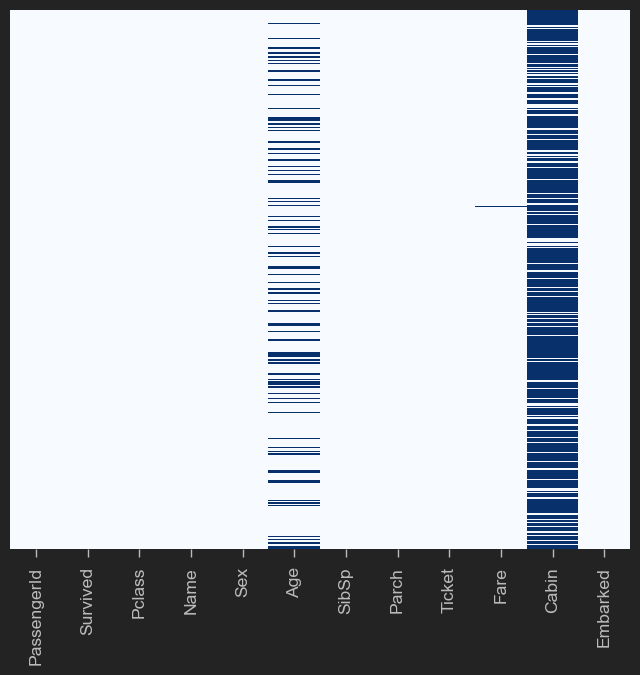

In [112]:
# Let's explore which dataset is missing
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [113]:
# Let's drop the cabin coloumn and test with inplace = true and false
titanic_df.drop('Cabin', axis=1, inplace=True)

In [114]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [115]:
# Let's drop the embarked, Ticket, passengerID, and Name as well
titanic_df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [116]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500
414,1,1,female,39.0,0,0,108.9000
415,0,3,male,38.5,0,0,7.2500
416,0,3,male,NaN,0,0,8.0500


<Axes: >

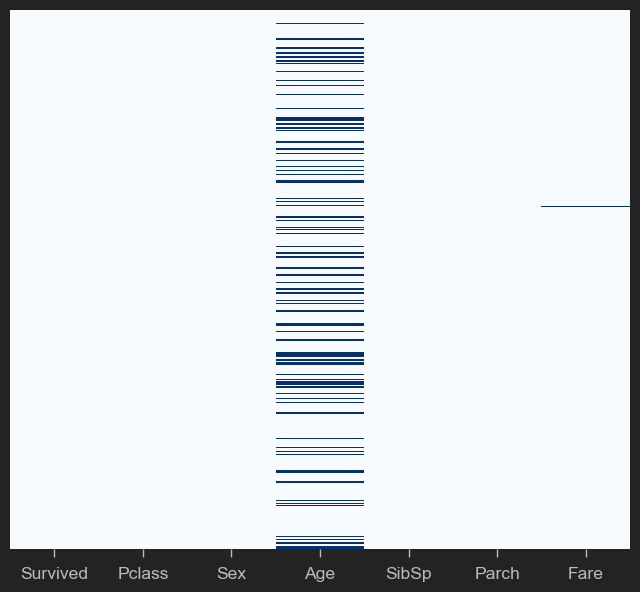

In [117]:
# Let's view the data one more time!
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


<Axes: xlabel='Sex', ylabel='Age'>

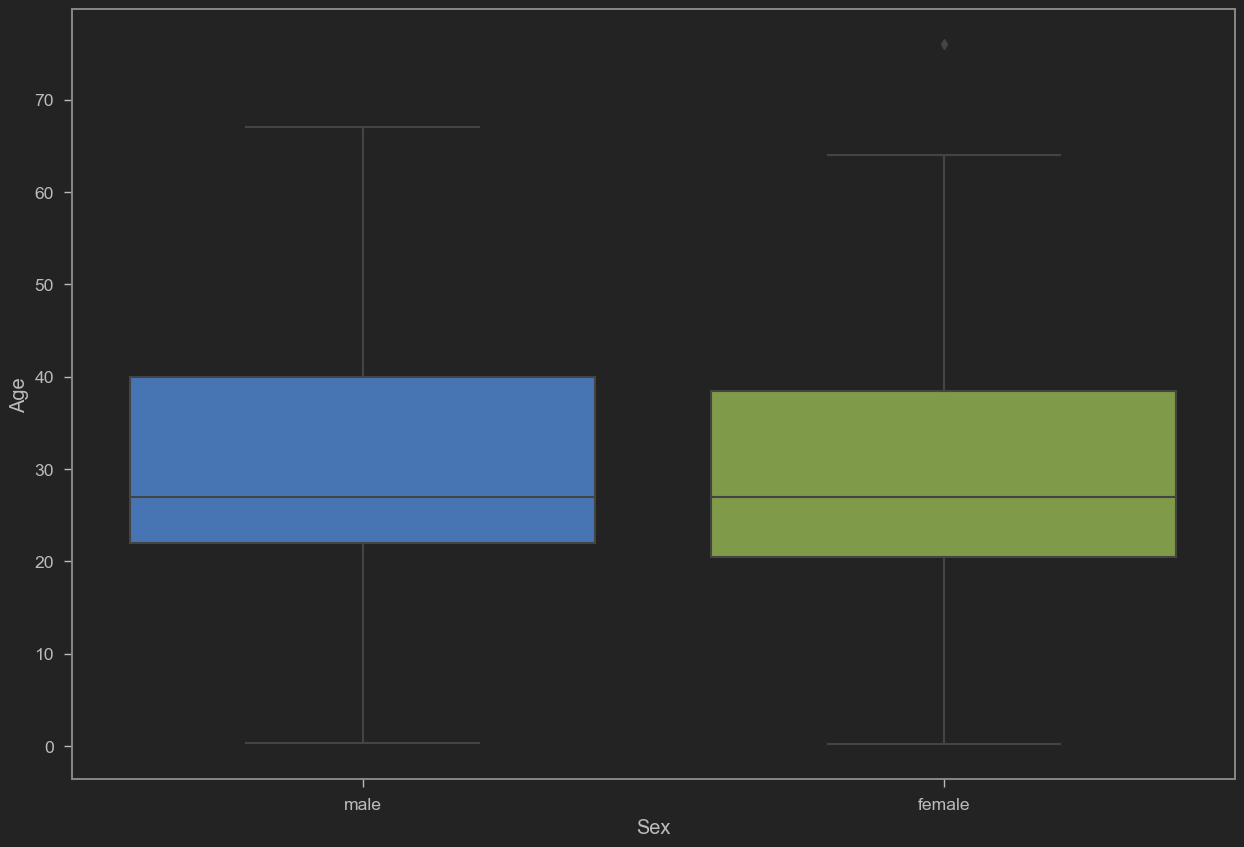

In [118]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Sex', y = 'Age', data = titanic_df)

In [119]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex is 'male': 
            return 29
        else:
            return 25
    else:
        return age
        

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Umar\AppData\Local\Temp\ipykernel_9808\1187701220.py:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sex is 'male':


In [120]:
titanic_df['Age'] = titanic_df[['Age', 'Sex']].apply(Fill_Age, axis = 1)

In [121]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,male,25.0,0,0,8.0500
414,1,1,female,39.0,0,0,108.9000
415,0,3,male,38.5,0,0,7.2500
416,0,3,male,25.0,0,0,8.0500


<Axes: >

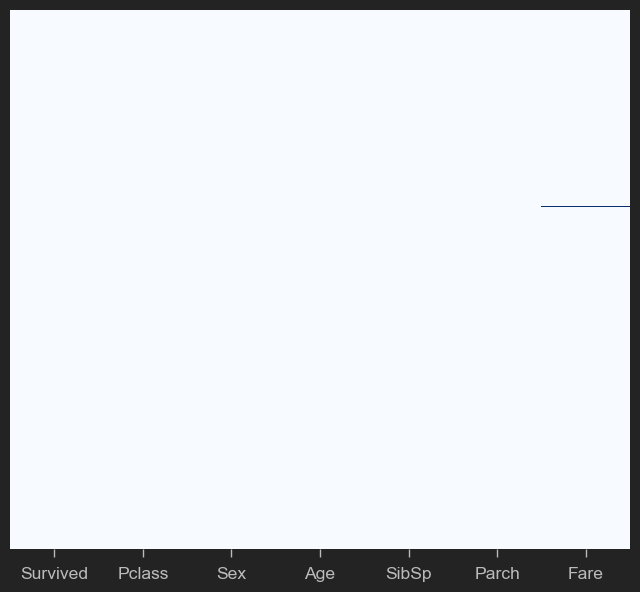

In [122]:
# Let's view the data one more time!
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [123]:
missing_values = titanic_df.isna().sum()
print(missing_values)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
dtype: int64


In [124]:
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)

<Axes: >

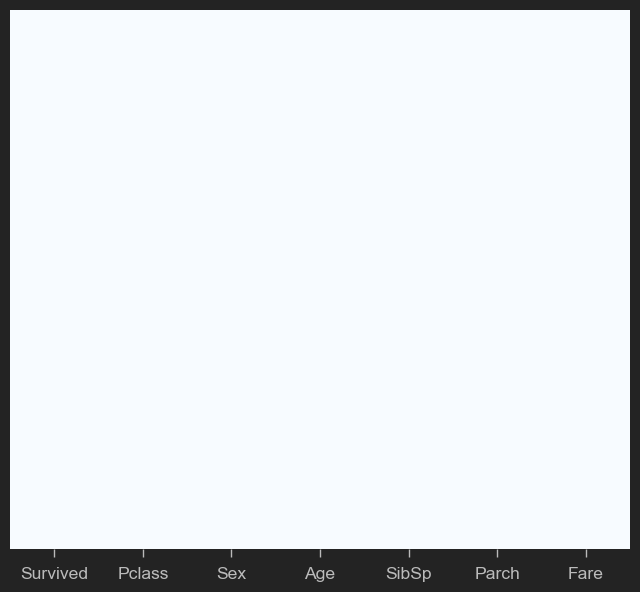

In [125]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [126]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,male,25.0,0,0,8.0500
414,1,1,female,39.0,0,0,108.9000
415,0,3,male,38.5,0,0,7.2500
416,0,3,male,25.0,0,0,8.0500


In [127]:
# You just need one column only to represent male or female
pd.get_dummies(titanic_df['Sex'])

,female,male
0,False,True
1,True,False
2,False,True
3,False,True
4,True,False
...,...,...
413,False,True
414,True,False
415,False,True
416,False,True


In [128]:
male = pd.get_dummies(titanic_df['Sex'], drop_first = True)


In [129]:
male

,male
0,True
1,False
2,True
3,True
4,False
...,...
413,True
414,False
415,True
416,True


In [130]:
# first let's drop the embarked and sex 
titanic_df.drop(['Sex'], axis = 1, inplace = True)

In [131]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,0,3,25.0,0,0,8.0500
414,1,1,39.0,0,0,108.9000
415,0,3,38.5,0,0,7.2500
416,0,3,25.0,0,0,8.0500


In [132]:
# Now let's add the encoded column male again
titanic_df = pd.concat([titanic_df, male], axis = 1)

In [133]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,34.5,0,0,7.8292,True
1,1,3,47.0,1,0,7.0000,False
2,0,2,62.0,0,0,9.6875,True
3,0,3,27.0,0,0,8.6625,True
4,1,3,22.0,1,1,12.2875,False
...,...,...,...,...,...,...,...
413,0,3,25.0,0,0,8.0500,True
414,1,1,39.0,0,0,108.9000,False
415,0,3,38.5,0,0,7.2500,True
416,0,3,25.0,0,0,8.0500,True


# TASK #6: TRAIN LOGISTIC REGRESSION CLASSIFIER MODEL

In [134]:
#Let's drop the target coloumn before we do train test split
X = titanic_df.drop('Survived', axis = 1).values
y = titanic_df['Survived'].values


In [135]:
X

array([[3, 34.5, 0, 0, 7.8292, True],
       [3, 47.0, 1, 0, 7.0, False],
       [2, 62.0, 0, 0, 9.6875, True],
       ...,
       [3, 38.5, 0, 0, 7.25, True],
       [3, 25.0, 0, 0, 8.05, True],
       [3, 25.0, 1, 1, 22.3583, True]], dtype=object)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [137]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import  LogisticRegression
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# TASK #7: ASSESS TRAINED MODEL PERFORMANCE

In [138]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

<Axes: >

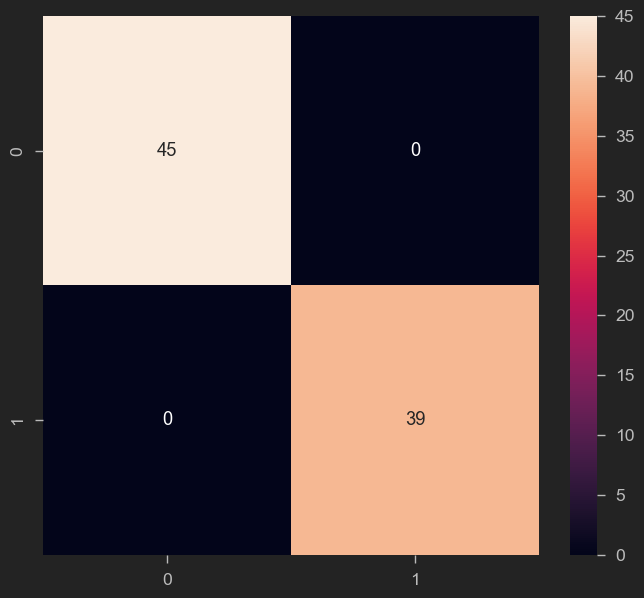

In [139]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        39

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

